In [1]:
import sys
## To get helper functions from ano`ther folder
# sys.path.insert(0, '../') # if _helper_basics_ is in previous folder
now_i_am_at = 'home' # home dso test
if now_i_am_at=='home':
    sys.path.insert(0, 'E:/Leonard HDD/Dropbox/DSO/Tasks/')
elif now_i_am_at=='dso':
    sys.path.insert(0, 'D:/Dropbox/DSO/Tasks')

from _helper_basics_ import *

%matplotlib inline
plt.rcParams['savefig.dpi'] = 100

%load_ext autoreload
%autoreload 2

print('keras', keras.__version__)
print('tensorflow', tf.__version__)

Using TensorFlow backend.


keras 2.0.8
tensorflow 1.3.0


# Data

In [ ]:
data_mode = 'reuters'
Data_dir = 'Data_'+data_mode+'/'

X_train = np.load(Data_dir+'X_train_reu.npy')
Y_train = np.load(Data_dir+'Y_train_reu.npy')
X_test = np.load(Data_dir+'X_test_reu.npy')
Y_test = np.load(Data_dir+'Y_test_reu.npy')

print('X_train', X_train.shape)
print('Y_train', Y_train.shape)
print('X_test ', X_test.shape)
print('Y_test ', Y_test.shape)

In [7]:
data_mode = 'imdb'
Data_dir = 'Data_'+data_mode+'/'

## Without splitting into train/test set
# X_train = np.load(Data_dir+'X_train_imdb.npy')
# Y_train = np.load(Data_dir+'Y_train_imdb.npy')

## Split into train/test set
X_train = np.load(Data_dir+'X_train_spliced.npy')
Y_train = np.load(Data_dir+'Y_train_spliced.npy')
X_test = np.load(Data_dir+'X_test_spliced.npy')
Y_test = np.load(Data_dir+'Y_test_spliced.npy')

print('X_train', X_train.shape)
print('Y_train', Y_train.shape)
print('X_test ', X_test.shape)
print('Y_test ', Y_test.shape)

X_train (20000, 80)
Y_train (20000, 2)
X_test  (4000, 80)
Y_test  (4000, 2)


In [25]:
Archi_dir = "v1/"
Weights_path = Archi_dir+"Logs/"
Ckpt_Mod_Weights_fold = Archi_dir+"Checkpoint_Model_Weights/"
if not os.path.exists(Archi_dir): os.mkdir(Archi_dir)
if not os.path.exists(Weights_path): os.mkdir(Weights_path)
if not os.path.exists(Ckpt_Mod_Weights_fold): os.mkdir(Ckpt_Mod_Weights_fold)
    
plot_path_dir = Archi_dir+'Plots/'
if not os.path.exists(plot_path_dir): os.mkdir(plot_path_dir)

## Setup 

In [11]:
num_words = 20000
input_length  = 80
num_class  = Y_train.shape[1] # 46
input_dim, output_dim = num_words, 128
########################### Architecture ##################################
def build_model_reg(dropout_rate, reg_l1=0., reg_l2=0.):
    Inp = Input(shape=(input_length,), name="Input")
    x   = Embedding(input_dim, output_dim, mask_zero=True, input_length=input_length)(Inp)
    x   = GRU(128, name="RNN_1", return_sequences=False, kernel_regularizer=l2(reg_l2))(x) 
    x   = Dropout(dropout_rate)(x)
    x   = Dense(num_class, activation='softmax',name = "Output" )(x)
    model = Model(Inp, x)
    ########################### Printing information ########################
    model.summary()
    # print_model_weights(model)
    
    return model

In [29]:
######################## Training Parameters ###############################
learning_rate = None;	print('learning_rate',learning_rate)
decay = 1e-9;          	print('decay',decay)
training_epochs = 100;	print('training_epochs',training_epochs)
batch_size = 32;		print('batch_size',batch_size)
######################## Checkpoints ###############################
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6, cooldown=5, epsilon=1e-05, verbose=1)

learning_rate None
decay 1e-09
training_epochs 100
batch_size 32


## Regularization with lr=1e-3

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 80)                0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 80, 128)           2560000   
_________________________________________________________________
RNN_1 (GRU)                  (None, 128)               98688     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
Output (Dense)               (None, 2)                 258       
Total params: 2,658,946
Trainable params: 2,658,946
Non-trainable params: 0
_________________________________________________________________
learning_rate 0.001
ckpt_path :  v1/Checkpoint_Model_Weights/1e-3/weights_LR-1.00e-03_Epoch-{epoch:04d}_VCA-{val_categorical_accurac

20000/20000 [==============================] - 136s - loss: 0.0088 - categorical_accuracy: 0.9987 - val_loss: 0.0084 - val_categorical_accuracy: 0.9985
Epoch 20/30
20000/20000 [==============================] - 136s - loss: 0.0126 - categorical_accuracy: 0.9975 - val_loss: 0.0086 - val_categorical_accuracy: 0.9990
Epoch 21/30
20000/20000 [==============================] - 136s - loss: 0.0098 - categorical_accuracy: 0.9981 - val_loss: 0.0050 - val_categorical_accuracy: 0.9998
Epoch 22/30
20000/20000 [==============================] - 136s - loss: 0.0056 - categorical_accuracy: 0.9995 - val_loss: 0.0058 - val_categorical_accuracy: 0.9995
Epoch 23/30
20000/20000 [==============================] - 136s - loss: 0.0042 - categorical_accuracy: 0.9996 - val_loss: 0.0027 - val_categorical_accuracy: 1.0000
Epoch 24/30
20000/20000 [==============================] - 136s - loss: 0.0048 - categorical_accuracy: 0.9994 - val_loss: 0.0060 - val_categorical_accuracy: 0.9992
Epoch 25/30
20000/20000 [===

NameError: name 'history_1' is not defined

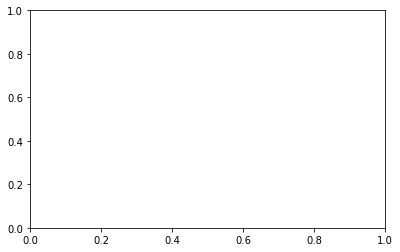

In [31]:
train_model_v1_2 = build_model_reg(dropout_rate=0.2, reg_l2=5/len(Y_train))

learning_rate = 1e-3;   print('learning_rate',learning_rate)
adam_opt  = Adam(lr=learning_rate, decay=decay)
train_model_v1_2.compile(loss='categorical_crossentropy', optimizer=adam_opt, metrics=['categorical_accuracy'])
######################## Checkpoints ###############################
CkptFold_det = ['{:.2e}'.format(learning_rate), Ckpt_Mod_Weights_fold, '1e-3/'] # [str_int, Ckpt_Mod_Weights_Fold, LR_Fold]
ModelCheckpoint_det = ['val_categorical_accuracy', 1, False, True, 1] # [monitor_modes, verbose_ckpt, save_best_only, save_weights_only, period]
ckpt = ckpt_saving(CkptFold_det, ModelCheckpoint_det, save_all=True)
csv_log = CSVLogger(Weights_path+'v1_2_Trg_log_{:.2e}.txt'.format(learning_rate), '\t', append=False)
plot_path = plot_path_dir+'v1_2_{:.2e}.png'.format(learning_rate)
############################### Training #############################
try:
    history_v1_2 = train_model_v1_2.fit(X_train,Y_train, batch_size=batch_size, epochs=30, verbose=1, 
                                         validation_split = 0., validation_data=(X_test,Y_test), # None (X_val,Y_val)
                                         callbacks=[reduce_lr, csv_log, ckpt]) 
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1);plot_loss(history_v1_2, metric_list=['loss','val_loss'], title='Loss', legend_list=['train', 'val'],  plot_path=plot_path)
    plt.subplot(1,2,2);plot_loss(history_v1_2, metric_list=['categorical_accuracy','val_categorical_accuracy'], title='Accuracy', legend_list=['train', 'val'], plot_path=plot_path)
    plt.tight_layout()
except KeyboardInterrupt: 
    print('\n\nKeyboardInterrupt !!!')

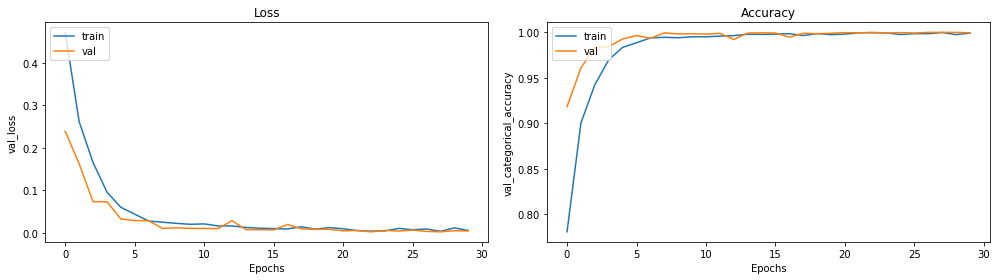

In [33]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1);plot_loss(history_v1_2, metric_list=['loss','val_loss'], title='Loss', legend_list=['train', 'val'],  plot_path=plot_path)
plt.subplot(1,2,2);plot_loss(history_v1_2, metric_list=['categorical_accuracy','val_categorical_accuracy'], title='Accuracy', legend_list=['train', 'val'], plot_path=plot_path)
plt.tight_layout()

In [35]:
############################## Evaluation #############################
result_train = train_model_v1_2.evaluate(X_train, Y_train, verbose=1)
print('\nresult_train:\n',result_train)
result_test = train_model_v1_2.evaluate(X_test, Y_test, verbose=1)
print('\nresult_test:\n',result_test)

20000/20000 [==============================] - 50s    

result_train:
 [0.0050589485116302969, 0.99939999999999996]
4000/4000 [==============================] - 10s    

result_test:
 [0.004798408726230264, 0.99950000000000006]
